In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [315]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [316]:
df['Age'].isnull().sum()

np.int64(177)

In [317]:
x = df.drop(columns=['Survived'])
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [318]:
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [319]:
x_train['Age_Impute'] = x_train['Age']
x_test['Age_Impute'] = x_test['Age']

In [320]:
x_train['Age_Impute'].isnull().sum()

np.int64(148)

In [321]:
x_train['Age_Impute'][x_train['Age_Impute'].isnull()]  = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

/tmp/ipython-input-321-3235722070.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_Impute'][x_train['Age_Impute'].isnull()]  = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


In [322]:
x_train

,Age,Fare,Age_Impute
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,18.0
493,71.0,49.5042,71.0
527,NaN,221.7792,3.0


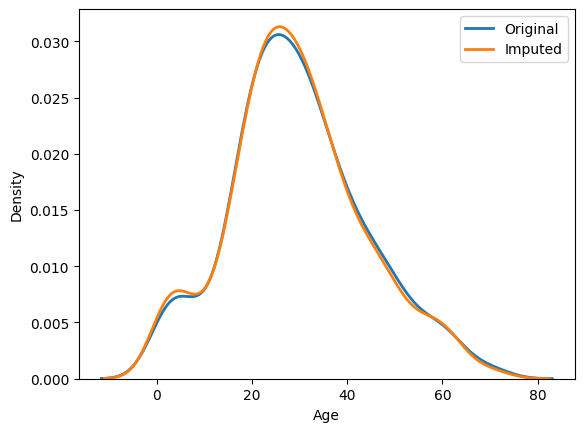

In [323]:
sns.kdeplot(x_train['Age'], label='Original', linewidth=2)
sns.kdeplot(x_train['Age_Impute'], label='Imputed', linewidth=2)

plt.legend()
plt.show()



In [324]:
x_train[['Age','Age_Impute']].cov()

,Age,Age_Impute
Age,204.349513,204.349513
Age_Impute,204.349513,202.511853


In [325]:
x_train[['Age','Age_Impute']].var()

,0
Age,204.349513
Age_Impute,202.511853


<Axes: >

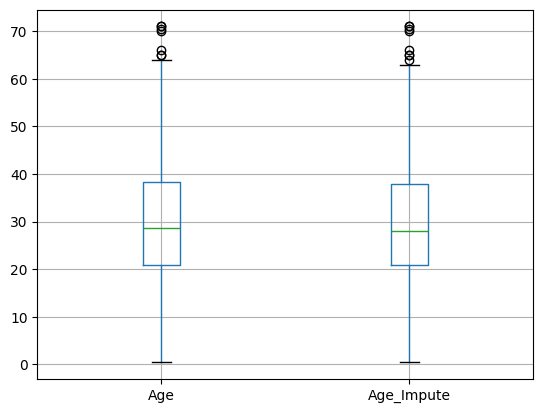

In [326]:
x_train[['Age','Age_Impute']].boxplot()

In [327]:
df1 = pd.read_csv('/content/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [328]:
df1

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [329]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [330]:
df1.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [331]:
x = df1.drop(columns=['SalePrice'])
y = df1['SalePrice']
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=42)

In [332]:
x_train1

,FireplaceQu,GarageQual
254,NaN,TA
1066,TA,TA
638,NaN,NaN
799,TA,TA
380,Gd,TA
...,...,...
1095,Gd,TA
1130,TA,TA
1294,NaN,TA
860,Gd,TA


In [333]:
x_train1.isnull().mean()*100

,0
FireplaceQu,46.832192
GarageQual,5.479452


In [334]:
x_train1['GarageQual']

,GarageQual
254,TA
1066,TA
638,NaN
799,TA
380,TA
...,...
1095,TA
1130,TA
1294,TA
860,TA


In [335]:
x_train1['GarageQual_Imputed'] = x_train1['GarageQual'].copy()
x_test1['GarageQual_Imputed'] = x_test1['GarageQual'].copy()

x_train1['FireplaceQu_Imputed'] = x_train1['FireplaceQu'].copy()
x_test1['FireplaceQu_Imputed'] = x_test1['FireplaceQu'].copy()

In [336]:
x_train1

,FireplaceQu,GarageQual,GarageQual_Imputed,FireplaceQu_Imputed
254,NaN,TA,TA,NaN
1066,TA,TA,TA,TA
638,NaN,NaN,NaN,NaN
799,TA,TA,TA,TA
380,Gd,TA,TA,Gd
...,...,...,...,...
1095,Gd,TA,TA,Gd
1130,TA,TA,TA,TA
1294,NaN,TA,TA,NaN
860,Gd,TA,TA,Gd


In [338]:
x_train1['FireplaceQu_Imputed'][x_train1['FireplaceQu_Imputed'].isnull()] =  x_train1['FireplaceQu'].dropna().sample(x_train1['FireplaceQu_Imputed'].isnull().sum()).values
x_train1['GarageQual_Imputed'][x_train1['GarageQual_Imputed'].isnull()] = x_train1['GarageQual_Imputed'].dropna().sample(x_train1['GarageQual_Imputed'].isnull().sum()).values

/tmp/ipython-input-338-2667314994.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train1['FireplaceQu_Imputed'][x_train1['FireplaceQu_Imputed'].isnull()] =  x_train1['FireplaceQu'].dropna().sample(x_train1['FireplaceQu_Imputed'].isnull

In [339]:
x_train1['FireplaceQu_Imputed'].isnull().sum()

np.int64(0)

In [340]:
x_train1['GarageQual_Imputed'].isnull().sum()

np.int64(0)